In [1]:
using Distributions
A = Int64[]
m = readline()      #number of samples
m = parse(Int64, m) 
l = readline()      #value of lambda
l = parse(Float64, l) 


stdin> 10000
stdin> 4


4.0

In [2]:
for i in 1:m
    x=0
    p=exp(-l)
    P_sum = p
    U = rand()     #uniform draw between 0 and 1
    while(1>0)
        if U<P_sum
            push!(A,x)   #collecting the random variables
            break
        else
            p = p*(l/(x+1))
            P_sum = P_sum + p
            x = x+1
            end
    end 
end


In [3]:
using Statistics
mean(A)

4.0245

In [4]:
var(A)

4.009300680068006

In [5]:
using Plots

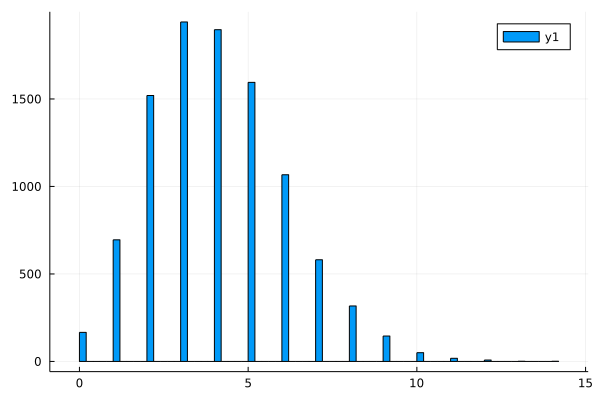

In [6]:
histogram(A)

In [7]:
len = length(A)

10000

In [8]:
function binomial_draw(n,p)
    
    c_array = Float64[]
    for i in 0:n            #to find the c 
        temp = binomial(n,i)*(p^i)*(1-p)^(n-i)*factorial(i)*(l^(-i))*exp(l)   
        push!(c_array,temp)
    end
    c = findmax(c_array) + 0.001
    accept = 0
    while accept == 0
        U = rand()
        prop = A[rand(1,len)]
        
        bi_value = binomial(n,prop)*(p^prop)*(1-p)^(n-prop)
        poi_value = ((l^(prop))*exp(-l))/factorial(prop)
        ratio = bi_value/(c*poi_value)
        
        if U<ratio
            accept = 1
            value = prop
        end
    end
    return value
end


binomial_draw (generic function with 1 method)

In [9]:
binomial_draw(10,0.5)

LoadError: MethodError: no method matching +(::Tuple{Float64, Int64}, ::Float64)
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at C:\Users\Diwakar\AppData\Local\Programs\Julia-1.7.2\share\julia\base\operators.jl:655
[0m  +([91m::Uniform[39m, ::Real) at C:\Users\Diwakar\.julia\packages\Distributions\O4ZJg\src\univariate\continuous\uniform.jl:115
[0m  +([91m::NormalCanon[39m, ::Real) at C:\Users\Diwakar\.julia\packages\Distributions\O4ZJg\src\univariate\continuous\normalcanon.jl:87
[0m  ...